## Bharat Sharma
## Analysing CMIP6 Data

1. Ensemble Mean
2. Multimodel Mean
3. Difference

In [73]:
import os,glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
#import warnings
#warnings.filterwarnings("ignore")



### Printing list of files that you downloaded

In [75]:
data_in = "/Users/bharat/repos/GitHub/Tutorials_by_Bharat/data/"
glob.glob(data_in+"gpp*.nc")

['/Users/bharat/repos/GitHub/Tutorials_by_Bharat/data/gpp_Lmon_CESM2_historical_r3i1p1f1_gn_185001-201412.nc',
 '/Users/bharat/repos/GitHub/Tutorials_by_Bharat/data/gpp_Lmon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc',
 '/Users/bharat/repos/GitHub/Tutorials_by_Bharat/data/gpp_Lmon_CanESM5_historical_r7i1p2f1_gn_185001-201412.nc',
 '/Users/bharat/repos/GitHub/Tutorials_by_Bharat/data/gpp_Lmon_CESM2_historical_r2i1p1f1_gn_185001-201412.nc']

## 1. Ensemble Mean

In [190]:
fname='gpp_Lmon_CESM2_*201412.nc'
ds=xr.open_mfdataset(data_in+fname,concat_dim='ensemble',combine='nested',decode_times=True)
print(data_in+fname)



/Users/bharat/repos/GitHub/Tutorials_by_Bharat/data/gpp_Lmon_CESM2_*201412.nc


In [191]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 3, time: 1980, lat: 192, lon: 288, hist_interval: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 11:45:00.000013 ... 2014-12-15 12:00:00
Dimensions without coordinates: ensemble, hist_interval
Data variables:
    gpp        (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 192, 288), meta=np.ndarray>
    time_bnds  (ensemble, time, hist_interval) object dask.array<chunksize=(1, 1980, 2), meta=np.ndarray>
    lat_bnds   (ensemble, lat, hist_interval) float32 dask.array<chunksize=(1, 192, 2), meta=np.ndarray>
    lon_bnds   (ensemble, lon, hist_interval) float32 dask.array<chunksize=(1, 288, 2), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:40:06Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [78]:
ds_emean=ds.mean(dim='ensemble')
ds_emean

<xarray.Dataset>
Dimensions:   (time: 1980, lat: 192, lon: 288, hist_interval: 2)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time      (time) object 1850-01-15 11:45:00.000013 ... 2014-12-15 12:00:00
Dimensions without coordinates: hist_interval
Data variables:
    gpp       (time, lat, lon) float32 dask.array<chunksize=(1980, 192, 288), meta=np.ndarray>
    lat_bnds  (lat, hist_interval) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds  (lon, hist_interval) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>

In [79]:
ds.gpp.sum(dim=['lat','lon'])

<xarray.DataArray 'gpp' (ensemble: 3, time: 1980)>
dask.array<sum-aggregate, shape=(3, 1980), dtype=float32, chunksize=(1, 1980), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-15 11:45:00.000013 ... 2014-12-15 12:00:00
Dimensions without coordinates: ensemble

In [80]:
## fixing time for ploting
ds['time'] = pd.to_datetime(ds.time.values.astype(str))


Text(0.5, 1.0, 'TS GPP multiple ensemble')

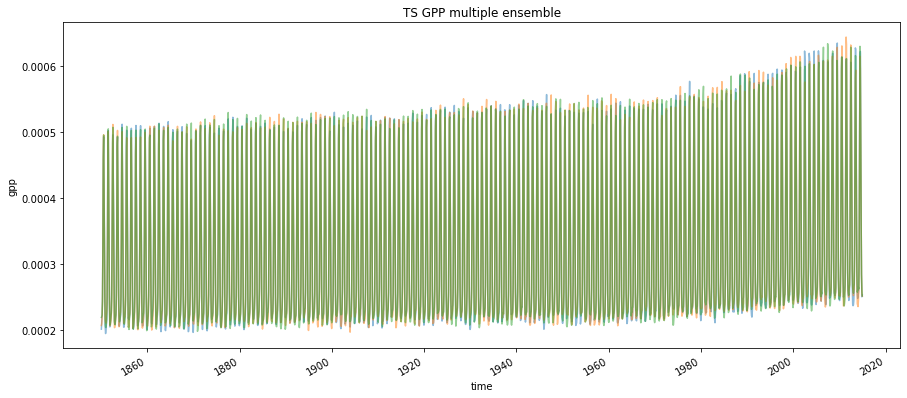

In [81]:
fig1 = plt.figure(figsize=(15,6))
for i in range(3):
    ds.gpp.sum(dim=['lat','lon'])[i].plot(alpha=.5)
plt.title("TS GPP multiple ensemble")
#plt.close(fig1)

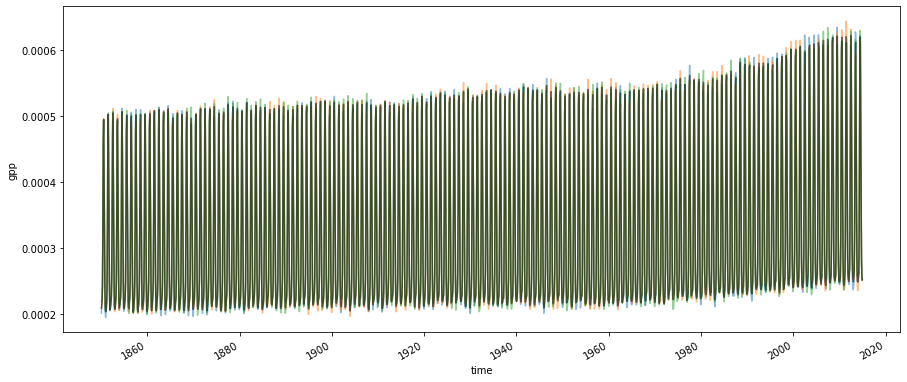

In [82]:
ds_emean['time'] = pd.to_datetime(ds_emean.time.values.astype(str))

fig2 = plt.figure(figsize=(15,6))
for i in range(3):
    ds.gpp.sum(dim=['lat','lon'])[i].plot(alpha=.5)

ds_emean.gpp.sum(dim=['lat','lon']).plot(alpha=.5, color='k')

#plt.close(fig2)

## 2. Multimodel Mean

In [83]:
filename="gpp_Lmon_CanESM5_historical_r7i1p2f1_gn_185001-201412.nc"
ds_can = xr.open_dataset(data_in+filename)

In [84]:
ds_can.gpp

<xarray.DataArray 'gpp' (time: 1980, lat: 64, lon: 128)>
[16220160 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    standard_name:  gross_primary_productivity_of_biomass_expressed_as_carbon
    long_name:      Carbon Mass Flux out of Atmosphere Due to Gross Primary P...
    comment:        changed up to down! d(u-mol C/m2.s) x (12.011E-9) = Kg C/...
    units:          kg m-2 s-1
    original_name:  CFGP
    history:        mltby12em9 2019-05-30T02:41:28Z altered by CMOR: Reordere...
    cell_methods:   area: mean where land time: mean
    cell_measures:  area: areacella

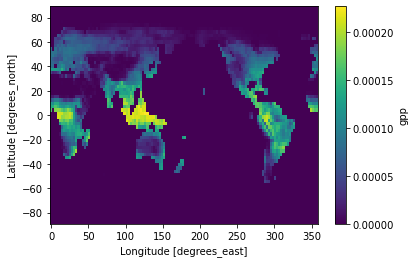

In [85]:
ds_can.gpp.sum(dim=["time"]).plot()

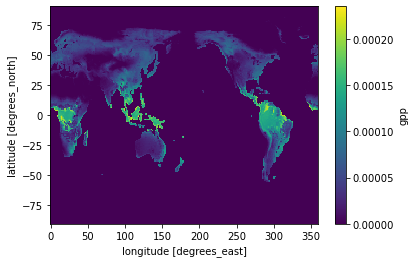

In [86]:
ds_emean.gpp.sum(dim=["time"]).plot()

In [87]:
ds_can.gpp.sum(dim=["time"]) - ds_emean.gpp.sum(dim=["time"])

<xarray.DataArray 'gpp' (lat: 0, lon: 32)>
dask.array<subtract, shape=(0, 32), dtype=float32, chunksize=(0, 32), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float64 0.0 11.25 22.5 33.75 45.0 ... 315.0 326.2 337.5 348.8

## Linear Interpolation /Regridding

In [88]:

lat_target = ds_can.lat.values
lon_target = ds_can.lon.values
gpp_CESM2_Regridded = ds_emean.gpp.interp(lat=lat_target,lon=lon_target)

In [89]:
gpp_CESM2_Regridded

<xarray.DataArray 'gpp' (time: 1980, lat: 64, lon: 128)>
dask.array<dask_aware_interpnd, shape=(1980, 64, 128), dtype=float32, chunksize=(1980, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-15T11:45:00.000013 ... 2014-12-15T...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [159]:
da_can_expand = ds_can.gpp.expand_dims('model')
da_cesm2_expand = gpp_CESM2_Regridded.expand_dims('model')

da_cesm2_expand["time"] = da_can_expand["time"] #  Hack to fix calendar issue; Not recommended! Try without it to identify the error

#Data Array Multi Model
da_mm = xr.concat([da_can_expand,da_cesm2_expand], dim='model') 

# DataArray of Multimodel Mean
da_mmm = da_mm.mean(dim='model')

Text(0.5, 1.0, 'Total GPP MultiModel Mean')

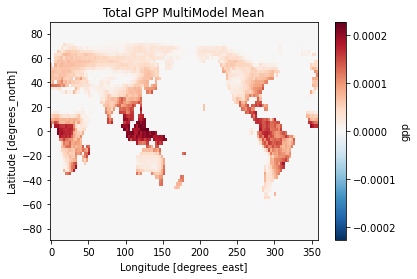

In [158]:
da_mmm.sum(dim='time').plot()
plt.title("Total GPP MultiModel Mean")

Text(0.5, 1.0, 'TS of Total GPP MultiModel Mean')

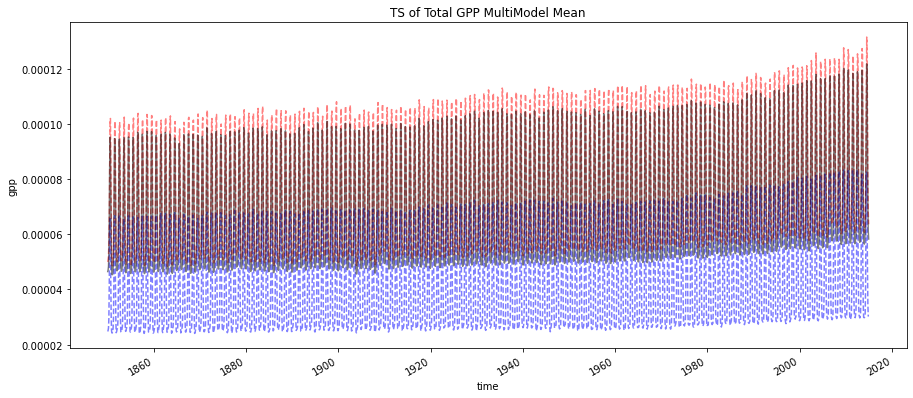

In [160]:
fig3=plt.figure(figsize=(15,6))
ds_can.gpp.sum(dim=['lat','lon']).plot(alpha=.5, color='r', ls='--')
gpp_CESM2_Regridded.sum(dim=['lat','lon']).plot(alpha=.5, color='b', ls='--')
da_mmm.sum(dim=['lat','lon']).plot(alpha=.5, color='k')
plt.title("TS of Total GPP MultiModel Mean")

## 3. Detla GPP
## GPP(CanESM5 - CESM2)

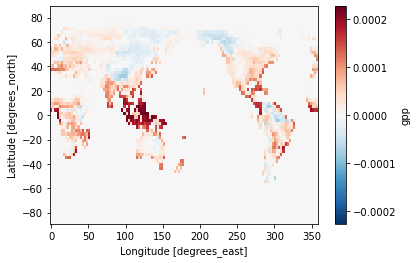

In [64]:
(ds_can.gpp.sum(dim=["time"]) - gpp_CESM2_Regridded.sum(dim="time")).plot()

In [166]:
from pyesgf.search import SearchConnection

In [167]:
conn = SearchConnection('https://esgf-node.llnl.gov/esg-search',
                        distrib=False)

In [170]:
ctx = conn.new_context(
    facets='project,experiment_id',
    project='CMIP6',
    table_id='fx',
    institution_id="NCAR",
    experiment_id='historical',
    source_id='CESM2',
    variable='areacella',
    variant_label='r1i1p1f1',
)

In [171]:
result = ctx.search()[0]
files = result.file_context().search()
files

In [172]:
files[0].opendap_url

'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/fx/areacella/gn/v20190308/areacella_fx_CESM2_historical_r1i1p1f1_gn.nc'

In [173]:
opendap_urls = [file.opendap_url for file in files]
opendap_urls

['http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/fx/areacella/gn/v20190308/areacella_fx_CESM2_historical_r1i1p1f1_gn.nc']

In [177]:
ds_area_cesm2 = xr.open_mfdataset(opendap_urls)

In [178]:
ds_area_cesm2.areacella

<xarray.DataArray 'areacella' (lat: 192, lon: 288)>
dask.array<open_dataset-3ad42e0030b3198cd106dd0650d4f3b9areacella, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes: (12/18)
    cell_methods:   area: sum
    comment:        Cell areas for any grid used to report atmospheric variab...
    description:    Cell areas for any grid used to report atmospheric variab...
    frequency:      fx
    id:             areacella
    long_name:      Grid-Cell Area for Atmospheric Grid Variables
    ...             ...
    time_title:     No temporal dimensions ... fixed field
    title:          Grid-Cell Area for Atmospheric Grid Variables
    type:           real
    units:          m2
    variable_id:    areacella
    _ChunkSizes:    [192 288]

In [180]:
ctx = conn.new_context(
    facets='project,experiment_id',
    project='CMIP6',
    table_id='fx',
    institution_id="NCAR",
    experiment_id='historical',
    source_id='CESM2',
    variable='sftlf',
    variant_label='r1i1p1f1',
)
result = ctx.search()[0]
files = result.file_context().search()
opendap_urls = [file.opendap_url for file in files]
ds_lf_cesm2 = xr.open_mfdataset(opendap_urls)
ds_lf_cesm2

<xarray.Dataset>
Dimensions:   (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds  (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds  (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
    sftlf     (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T21:53:09Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [183]:
ds.gpp.units

'kg m-2 s-1'

In [184]:
ds_lf_cesm2.sftlf.units

'%'

In [185]:
ds_area_cesm2.areacella.units

'm2'

kg m<sup>-2</sup> s<sup>-1</sup> x % x m<sup>2</sup> or kg s<sup>-1</sup> 10<sup>-2</sup> or 10 g s<sup>-1</sup>= 864000 g d<sup>-1</sup> 

How would you calculate in g month<sup>-1</sup>?

In [200]:
#Hint
ds.time_bnds[0].values


array([[cftime.DatetimeNoLeap(1849, 12, 31, 23, 29, 59, 999987, has_year_zero=True),
        cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True)],
       ...,
       [cftime.DatetimeNoLeap(2014, 10, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)]],
      dtype=object)

In [201]:
ds_unitsC = 864000 * ds # g d-1

In [202]:
ds_emean_unitsC=ds_unitsC.mean(dim='ensemble')
ds_emean_unitsC

<xarray.Dataset>
Dimensions:   (lat: 192, lon: 288, time: 1980, hist_interval: 2)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time      (time) object 1850-01-15 11:45:00.000013 ... 2014-12-15 12:00:00
Dimensions without coordinates: hist_interval
Data variables:
    gpp       (time, lat, lon) float64 dask.array<chunksize=(1980, 192, 288), meta=np.ndarray>
    lat_bnds  (lat, hist_interval) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds  (lon, hist_interval) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>

In [ ]:
ds_emean_unitsC['time'] = pd.to_datetime(ds_emean_unitsC.time.values.astype(str))
ds_unitsC['time'] = pd.to_datetime(ds_unitsC.time.values.astype(str))
fig2 = plt.figure(figsize=(15,6))
for i in range(3):
    ds_unitsC.gpp.sum(dim=['lat','lon'])[i].plot(alpha=.5)

ds_emean_unitsC.gpp.sum(dim=['lat','lon']).plot(alpha=.5, color='k')
